In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('delhiaqi.csv')
print("Dataset Loaded Successfully!")
print("Columns:", list(df.columns))

Dataset Loaded Successfully!
Columns: ['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']


In [4]:
df = df.rename(columns={'date': 'Date',
                        'pm2_5': 'PM2_5',
                        'pm10': 'PM10',
                        'no2': 'NO2',
                        'so2': 'SO2',
                        'o3': 'O3',
                        'co': 'CO',
                        'no': 'NO',
                        'nh3': 'NH3'})

In [5]:
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    561 non-null    object 
 1   CO      561 non-null    float64
 2   NO      561 non-null    float64
 3   NO2     561 non-null    float64
 4   O3      561 non-null    float64
 5   SO2     561 non-null    float64
 6   PM2_5   561 non-null    float64
 7   PM10    561 non-null    float64
 8   NH3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [6]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])  # remove invalid date rows if any
df = df.sort_values('Date').reset_index(drop=True)

# Add new columns for Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%b')

In [7]:
# Create a new Estimated AQI column using weighted pollutants
df['AQI'] = (
    df['PM2_5'] * 0.50 +
    df['PM10']  * 0.30 +
    df['NO2']   * 0.10 +
    df['SO2']   * 0.05 +
    df['O3']    * 0.05
)

print("Average Estimated AQI:", round(df['AQI'].mean(), 2))
print("Highest Estimated AQI:", round(df['AQI'].max(), 2))
print("Lowest Estimated AQI:", round(df['AQI'].min(), 2))

Average Estimated AQI: 317.69
Highest Estimated AQI: 1155.66
Lowest Estimated AQI: 60.23


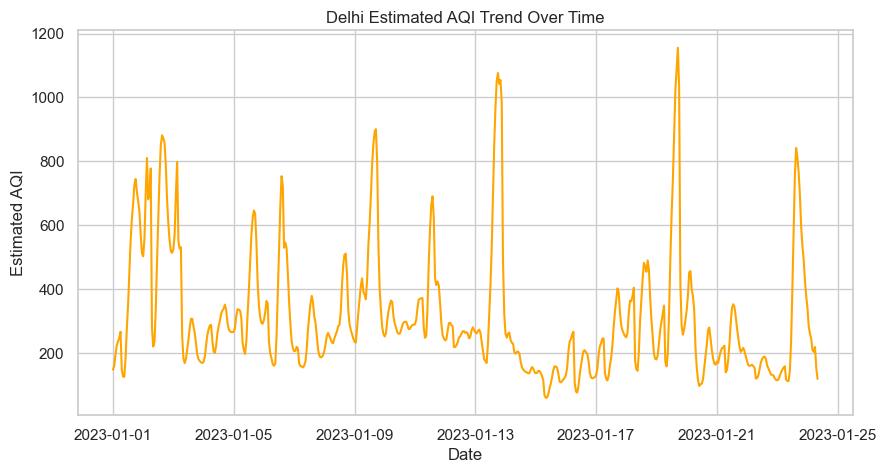

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['AQI'], color='orange')
plt.title('Delhi Estimated AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated AQI')
plt.show()

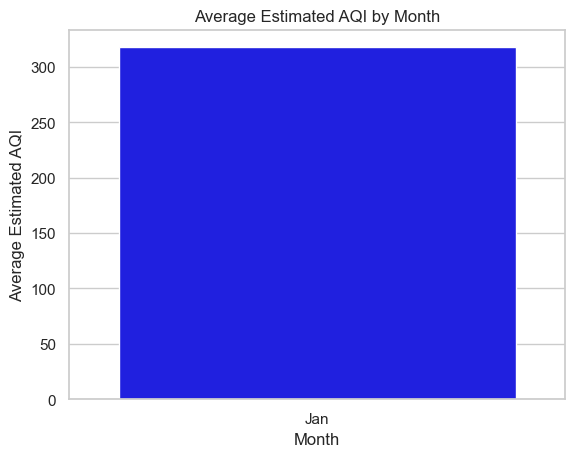

In [9]:
import seaborn as sns
monthly_aqi = df.groupby('Month_Name')['AQI'].mean()
sns.barplot(x=monthly_aqi.index, y=monthly_aqi.values, color='blue')
plt.title('Average Estimated AQI by Month')
plt.xlabel('Month')
plt.ylabel('Average Estimated AQI')
plt.show()

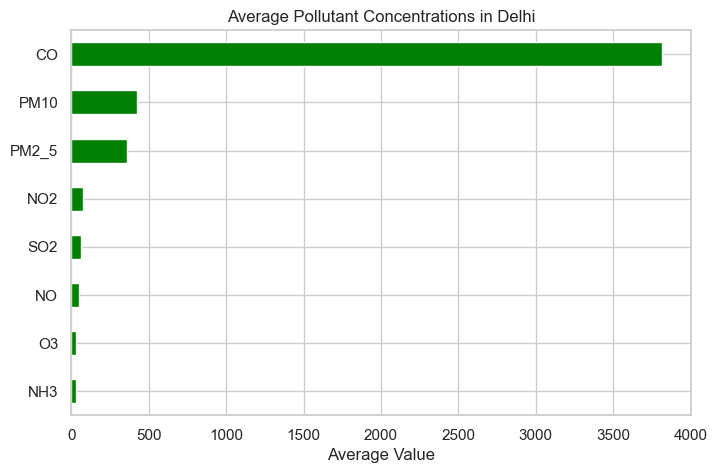

In [10]:
pollutants = ['PM2_5','PM10','NO2','SO2','O3','CO','NO','NH3']
plt.figure(figsize=(8,5))
df[pollutants].mean().sort_values().plot(kind='barh', color='green')
plt.title('Average Pollutant Concentrations in Delhi')
plt.xlabel('Average Value')
plt.show()

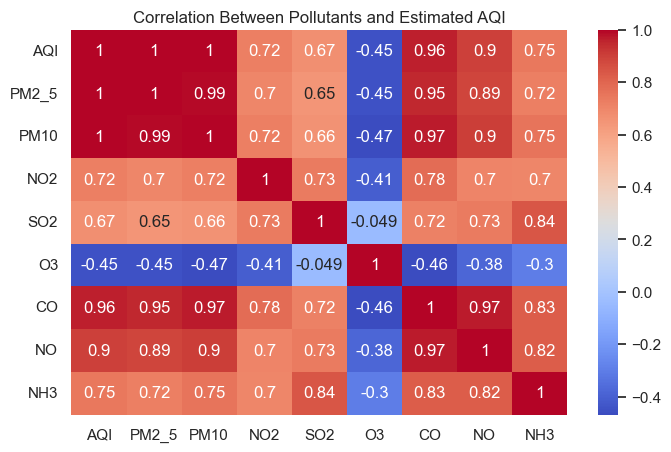

In [11]:
corr = df[['AQI'] + pollutants].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutants and Estimated AQI')
plt.show()